### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
ingreso_total_tienda1=tienda1['Precio'].sum()
print(f'Tienda 1: {ingreso_total_tienda1}')
ingreso_total_tienda2=tienda2['Precio'].sum()
print(f'Tienda 2: {ingreso_total_tienda2}')
ingreso_total_tienda3=tienda3['Precio'].sum()
print(f'Tienda 3: {ingreso_total_tienda3}')
ingreso_total_tienda4=tienda4['Precio'].sum()
print(f'Tienda 4: {ingreso_total_tienda4}')

Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


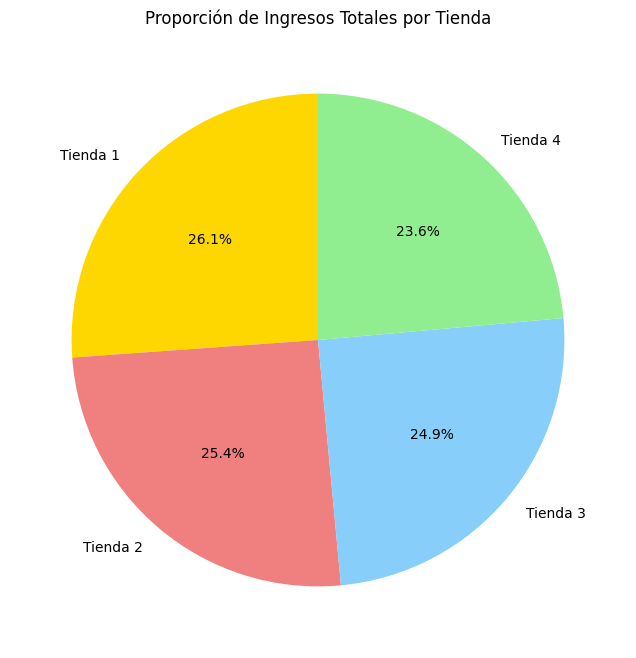

In [ ]:
ingresos = [ingreso_total_tienda1, ingreso_total_tienda2, ingreso_total_tienda3, ingreso_total_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 8))
plt.pie(ingresos, labels=tiendas, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Proporción de Ingresos Totales por Tienda")
plt.show()

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
tienda1_categoria=tienda1.groupby('Categoría del Producto')['Categoría del Producto'].count()
print(tienda1_categoria)

Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
Name: Categoría del Producto, dtype: int64


In [ ]:
tienda2_categoria=tienda2.groupby('Categoría del Producto')['Categoría del Producto'].count()
print(tienda2_categoria)

Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
Name: Categoría del Producto, dtype: int64


In [ ]:
tienda3_categoria=tienda3.groupby('Categoría del Producto')['Categoría del Producto'].count()
print(tienda3_categoria)

Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
Name: Categoría del Producto, dtype: int64


In [ ]:
tienda4_categoria=tienda4.groupby('Categoría del Producto')['Categoría del Producto'].count()
print(tienda4_categoria)

Categoría del Producto
Artículos para el hogar    201
Deportes y diversión       277
Electrodomésticos          254
Electrónicos               451
Instrumentos musicales     170
Juguetes                   338
Libros                     187
Muebles                    480
Name: Categoría del Producto, dtype: int64


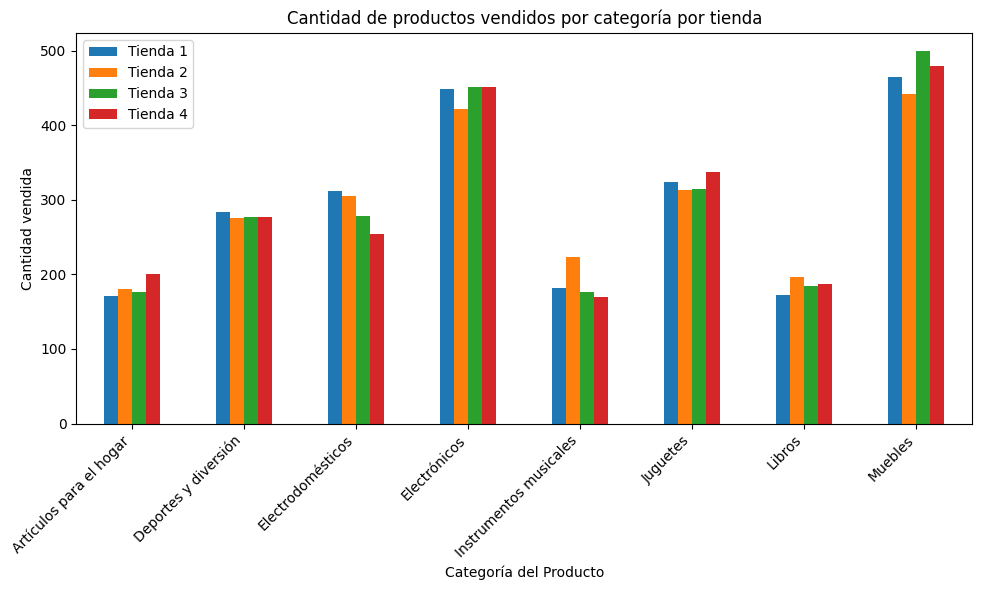

In [ ]:
categorias_tiendas = pd.DataFrame({
    'Tienda 1': tienda1_categoria,
    'Tienda 2': tienda2_categoria,
    'Tienda 3': tienda3_categoria,
    'Tienda 4': tienda4_categoria
})

categorias_tiendas.plot(kind='bar', figsize=(10, 6))
plt.title("Cantidad de productos vendidos por categoría por tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
calificacion_promedio_tienda1=round(tienda1['Calificación'].mean(),2)
print(f'La calificación promedio de la tienda 1 es {calificacion_promedio_tienda1}')

La calificación promedio de la tienda 1 es 3.98


In [ ]:
calificacion_promedio_tienda2=round(tienda2['Calificación'].mean(),2)
print(f'La calificación promedio de la tienda 2 es {calificacion_promedio_tienda2}')

La calificación promedio de la tienda 2 es 4.04


In [ ]:
calificacion_promedio_tienda3=round(tienda3['Calificación'].mean(),2)
print(f'La calificación promedio de la tienda 3 es {calificacion_promedio_tienda3}')

La calificación promedio de la tienda 3 es 4.05


In [ ]:
calificacion_promedio_tienda4= round(tienda4['Calificación'].mean(),2)
print(f'La calificación promedio de la tienda 4 es {calificacion_promedio_tienda4}')

La calificación promedio de la tienda 4 es 4.0


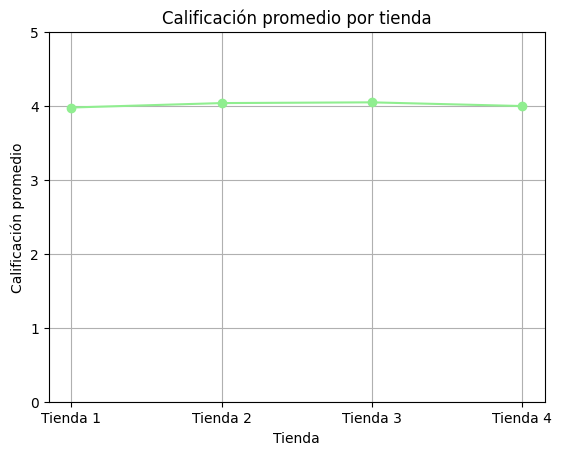

In [ ]:
calificaciones = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.plot(tiendas, calificaciones, marker='o', linestyle='-', color='lightgreen')
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.grid(True)
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
tienda1_producto=tienda1.groupby('Producto')['Producto'].count()
#print(tienda1_producto)

producto_mas_vendido = tienda1_producto.idxmax()
cantidad_mas_vendido=tienda1_producto.max()
print(f"🔝 Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} unidades)")

producto_menos_vendido = tienda1_producto.idxmin()
cantidad_menos_vendida = tienda1_producto.min()
print(f"🔻 Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} unidades)")

🔝 Producto más vendido: Armario (60 unidades)
🔻 Producto menos vendido: Auriculares con micrófono (33 unidades)


In [ ]:
tienda2_producto=tienda2.groupby('Producto')['Producto'].count()
#print(tienda1_producto)

producto_mas_vendido = tienda2_producto.idxmax()
cantidad_mas_vendido=tienda2_producto.max()
print(f"🔝 Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} unidades)")

producto_menos_vendido = tienda2_producto.idxmin()
cantidad_menos_vendida = tienda2_producto.min()
print(f"🔻 Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} unidades)")

🔝 Producto más vendido: Iniciando en programación (65 unidades)
🔻 Producto menos vendido: Juego de mesa (32 unidades)


In [ ]:
tienda3_producto=tienda3.groupby('Producto')['Producto'].count()
#print(tienda1_producto)

producto_mas_vendido = tienda3_producto.idxmax()
cantidad_mas_vendido=tienda3_producto.max()
print(f"🔝 Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} unidades)")

producto_menos_vendido = tienda3_producto.idxmin()
cantidad_menos_vendida = tienda3_producto.min()
print(f"🔻 Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} unidades)")

🔝 Producto más vendido: Kit de bancas (57 unidades)
🔻 Producto menos vendido: Bloques de construcción (35 unidades)


In [ ]:
tienda4_producto=tienda4.groupby('Producto')['Producto'].count()
#print(tienda1_producto)

producto_mas_vendido = tienda4_producto.idxmax()
cantidad_mas_vendido=tienda4_producto.max()
print(f"🔝 Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendido} unidades)")

producto_menos_vendido = tienda4_producto.idxmin()
cantidad_menos_vendida = tienda4_producto.min()
print(f"🔻 Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} unidades)")

🔝 Producto más vendido: Cama box (62 unidades)
🔻 Producto menos vendido: Guitarra eléctrica (33 unidades)


# 5. Envío promedio por tienda

In [ ]:
tienda1_envio=round(tienda1['Costo de envío'].mean(),2)
print(tienda1_envio)

26018.61


In [ ]:
tienda2_envio=round(tienda2['Costo de envío'].mean(),2)
print(tienda2_envio)

25216.24


In [ ]:
tienda3_envio=round(tienda3['Costo de envío'].mean(),2)
print(tienda3_envio)

24805.68


In [ ]:
tienda4_envio=round(tienda4['Costo de envío'].mean(),2)
print(tienda4_envio)

23459.46


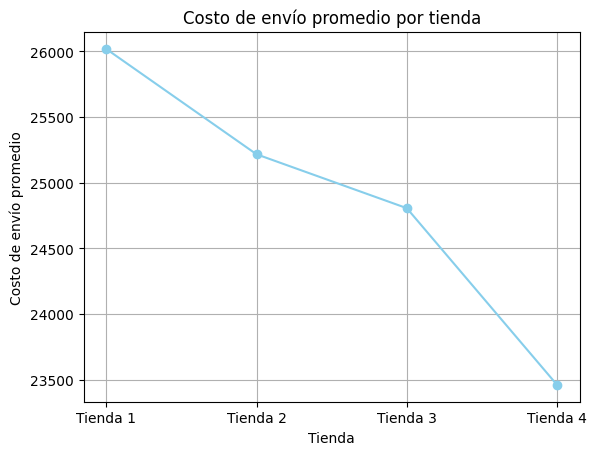

In [ ]:
envios = [tienda1_envio, tienda2_envio, tienda3_envio, tienda4_envio]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.plot(tiendas, envios, marker='o', linestyle='-', color='skyblue')
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio")
plt.grid(True)
plt.show()

#Informe Final

Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.

##Introducción
El objetivo del análisis es recomendar al Sr. Juan cual es la tienda que debe vender para poder iniciar un nuevo empredimiento, de acuerdo a los datos proporcionados de las 4 tiendas AluraStore que tiene.

##Desarrollo
- La tienda que menos vende es la tienda 4, ya que en total vende: 1 038 375 700.0
- Las categorías más vendidas en todas las tiendas son los "Muebles" y la categoría menos vendida están entre "Libros", "Instrumentos Musicales" y "Artículos para el hogar"
- Las calificaciones de las tiendas van entre 3.98 y 4.05, de las cuales la menor calificación ha sido para la tienda 1. Sin embargo, las calificaciones no varían mucho, por lo que se entiende que todas las tiendas tiene un calificación aceptable y similar para atención al cliente.
- El producto más vendido en la tienda 1 es "Armario" con una cantidad de 60 unidades y el producto menos vendido es "Auriculares con micrófono" con una cantidad de 33 unidades.
- El producto más vendido en la tienda 2 es "Iniciando en programación" con una cantidad de 65 unidades y el producto menos vendido es "Juego de mesa" con una cantidad de 32 unidades.
- El producto más vendido en la tienda 3 es "Kit de bancas" con una cantidad de 57 unidades y el producto menos vendido es "Bloques de construcción" con una cantidad de 35 unidades.
- El producto más vendido en la tienda 4 es "Cama box" con una cantidad de 62 unidades y el producto menos vendido es "Guitarra eléctrica" con una cantidad de 33 unidades.
- El mayor costo de envío promedio es de la tienda 1 con 26018.61, mientras que el costo de envío promedio menor es de la tienda 4.

##Conclusiones
La tienda que se debe vender es la tienda 4 ya que muestra bajo desempeño en varios frentes (ventas, rotación de productos, baja demanda por categoría) y sería la menos riesgosa de dejar.